In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures as pf
from sklearn import svm
from sklearn.preprocessing import MinMaxScaler as mms
import pandas as pd
from sklearn.linear_model import LinearRegression
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregCustom import ForecasterAutoregCustom
from skforecast.ForecasterAutoregDirect import ForecasterAutoregDirect
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from skforecast.model_selection import grid_search_forecaster
from datetime import datetime
from arch import arch_model
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm

In [2]:
articles_df = pd.read_json("../data/articles.json")

articles_df

,id,uri,pubdate,title,summary,text,eu,seu
0,b9317aba-38de-4f0c-a4b1-4c3b278a714b,https://donya-e-eqtesad.com/بخش-%D8%AE%D8%A8%D...,2023-06-21T20:30:00+00:00,تنها برجام در دستورکار نیست,دنیای‌اقتصاد :ابراهیم رئیسی، رئیس‌جمهوری سه‌شن...,ابراهیم رئیسی، رئیس‌جمهوری سه‌شنبه‌شب در دومین...,1,1
1,e4b22b41-4e74-452b-a8a0-5aaedb3a0778,https://donya-e-eqtesad.com/بخش-%D8%AF%D9%86%D...,2023-06-21T20:30:00+00:00,جولان عزرائیل در میان فقرای آمریکایی,دنیای‌اقتصاد :کارشناسان می‌گویند که آمریکا از ...,تحقیقات دانشگاه کالیفرنیا، ریورساید که اوایل س...,1,0
2,0bfac253-4768-4c74-86ef-fa929ed753c3,https://donya-e-eqtesad.com/بخش-%D8%B3%D8%B1%D...,2023-06-21T20:30:00+00:00,همت آغازین تامین مالی جمعی,میلاد خوش‌زبان*یکی از بزرگ‌ترین چالش‌های شرکت‌...,برای پاسخ به این نیاز، تامین مالی جمعی (crowdf...,1,0
3,1fd90c33-f171-4ce3-85f0-015ab242927d,https://donya-e-eqtesad.com/بخش-%D9%85%D8%B3%D...,2023-06-21T20:30:00+00:00,قد و وزن وام جدید مسکن,دنیای‌اقتصاد - نجمه رجب :سقف وام خرید مسکن در ...,به گزارش «دنیای‌اقتصاد»، وام مسکن از محل خرید ...,1,0
4,141d9785-9030-4a02-9f8e-1a4b6190fa6b,https://donya-e-eqtesad.com/بخش-%D9%85%D8%B3%D...,2023-06-21T20:30:00+00:00,زمین هست، خانه نیست,دنیای‌اقتصاد: تازه‌‌‌ترین گزارش وزارت راه وشهر...,در این گزارش در حالی از رسیدن ۱۸۱‌هزار و ۷۰۱ و...,1,0
...,...,...,...,...,...,...,...,...
26118,a0cd627f-2443-4e4e-8d16-b609e3aa9ab6,https://donya-e-eqtesad.com/بخش-%D8%B3%D8%B1%D...,2006-08-03T07:30:00+00:00,بن‌بست اپراتور دوم,شهرام شریف بخش فناوری اطلاعات و ارتباطات در کش...,شهرام شریفبخش فناوری اطلاعات و ارتباطات در کشو...,0,0
26119,f56418cc-08e3-4731-9fa1-82173e6cc401,https://donya-e-eqtesad.com/بخش-%D8%B3%D8%B1%D...,2006-08-02T07:30:00+00:00,اقتصاد کاسترو,محمود صدریمقا‌م‌های کوبایی گفته‌اند انتقال قدر...,محمود صدریمقا‌م‌های کوبایی گفته‌اند انتقال قدر...,1,0
26120,adc333e0-d687-44ff-be65-b0ba624e337a,https://donya-e-eqtesad.com/بخش-%D8%B3%D8%B1%D...,2006-08-01T07:30:00+00:00,خوابی کوتاه برای نقدینگی,پویا جبل‌عاملیشکاف بین رشد نقدینگی و نرخ تورم ...,پویا جبل‌عاملیشکاف بین رشد نقدینگی و نرخ تورم ...,1,0
26121,3e04d69c-65b9-4493-bbdd-d23d8e3f5f4a,https://donya-e-eqtesad.com/بخش-%D8%B3%D8%B1%D...,2006-07-31T07:30:00+00:00,اصلاح ساختار اقتصادی از شعار تا واقعیت,امروزه شاید کسی مخالف این ادعا نباشد که اقتصاد...,امروزه شاید کسی مخالف این ادعا نباشد که اقتصاد...,1,0


In [3]:
monthly_df = (
    pd.read_json("../data/monthly_metrics.json")
    .transpose()
    .iloc[::-1]
    .reset_index()
    .rename(columns={"index": "month"})
)

monthly_df.set_index("month", inplace=True)

monthly_df

,total_articles,total_eu,total_seu,eu,seu
month,,,,,
2006-07-01,2.0,1.0,0.0,0.500000,0.000000
2006-08-01,25.0,19.0,5.0,0.760000,0.200000
2006-09-01,24.0,21.0,2.0,0.875000,0.083333
2006-10-01,22.0,16.0,1.0,0.727273,0.045455
2006-11-01,26.0,21.0,4.0,0.807692,0.153846
...,...,...,...,...,...
2023-02-01,247.0,232.0,60.0,0.939271,0.242915
2023-03-01,151.0,140.0,50.0,0.927152,0.331126
2023-04-01,250.0,227.0,58.0,0.908000,0.232000


In [4]:
quarterly_df = (
    pd.read_json("../data/quarterly_metrics.json")
    .transpose()
    .iloc[::-1]
    .reset_index()
    .rename(columns={"index": "quarter"})
)

quarterly_df.set_index("quarter", inplace=True)

quarterly_df

,total_articles,total_eu,total_seu,eu,seu
quarter,,,,,
2006-07-01,51.0,41.0,7.0,0.803922,0.137255
2006-10-01,73.0,57.0,7.0,0.780822,0.095890
2007-01-01,60.0,51.0,3.0,0.850000,0.050000
2007-04-01,73.0,59.0,3.0,0.808219,0.041096
2007-07-01,77.0,64.0,7.0,0.831169,0.090909
...,...,...,...,...,...
2022-04-01,821.0,744.0,262.0,0.906212,0.319123
2022-07-01,843.0,777.0,245.0,0.921708,0.290629
2022-10-01,891.0,792.0,228.0,0.888889,0.255892


In [5]:
pesaran_df = pd.read_excel("../data/pesaran.xlsx")

pesaran_df["quarter"] = pd.to_datetime(pesaran_df["quarter"])

pesaran_df = pesaran_df[["quarter", "s_t"]].reset_index().drop(columns=["index"])

pesaran_df.set_index("quarter", inplace=True)

pesaran_df

,s_t
quarter,
1979-04-01,0.077507
1979-07-01,0.043900
1979-10-01,0.714879
1980-01-01,1.299615
1980-04-01,2.234835
...,...
2020-07-01,0.205385
2020-10-01,NaN
2021-01-01,NaN


<AxesSubplot:xlabel='month'>

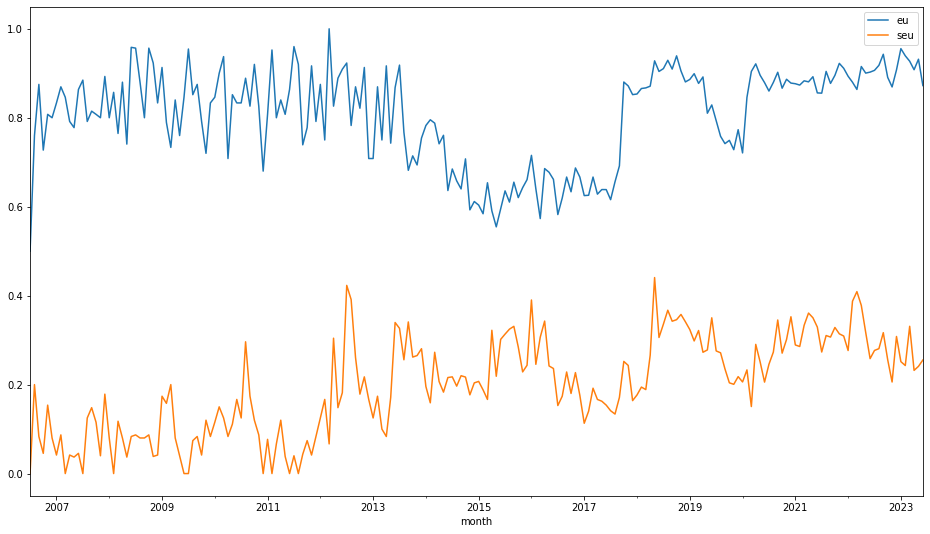

In [6]:
monthly_df.plot.line(y=["eu", "seu"], figsize=(16, 9))

<AxesSubplot:xlabel='quarter'>

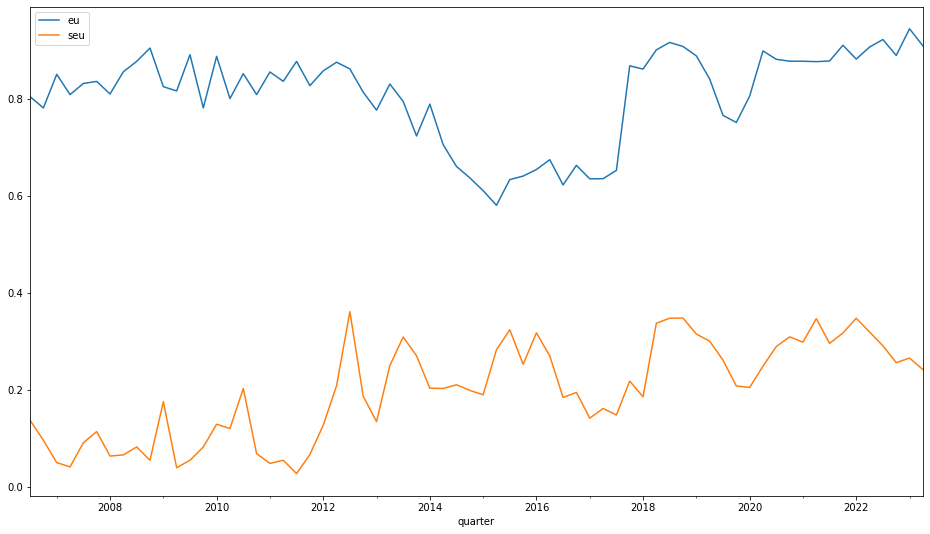

In [7]:
quarterly_df.plot.line(y=["eu", "seu"], figsize=(16, 9))

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

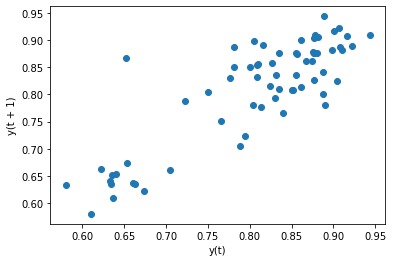

In [8]:
pd.plotting.lag_plot(quarterly_df["eu"], lag=1)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

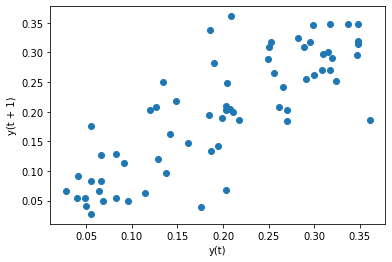

In [9]:
pd.plotting.lag_plot(quarterly_df["seu"], lag=1)

In [10]:
pd.DataFrame(
    {
        "mean": {
            "eu": articles_df["eu"].mean(),
            "seu": articles_df["seu"].mean(),
        },
        "std": {
            "eu": articles_df["eu"].std(),
            "seu": articles_df["seu"].std(),
        },
        "autocorr": {
            "eu": quarterly_df["eu"].autocorr(lag=1),
            "seu": quarterly_df["seu"].autocorr(lag=1),
        },
    }
)

,mean,std,autocorr
eu,0.821690,0.382781,0.850673
seu,0.257972,0.437527,0.813710


In [11]:
pd.DataFrame(
    {
        "eu": quarterly_df.iloc[:57]["eu"].to_list(),
        "seu": quarterly_df.iloc[:57]["seu"].to_list(),
        "lp": pesaran_df.iloc[109:-4]["s_t"].to_list(),
    }
).corr()

,eu,seu,lp
eu,1.000000,-0.15952,0.462882
seu,-0.159520,1.00000,0.209880
lp,0.462882,0.20988,1.000000


In [12]:
usd_df = pd.read_csv("../data/usd_toman_history.csv").drop(
    columns=["date_pr", "source"]
)

usd = pd.read_csv("../data/DollarPrice.csv")


usd["Date"] = pd.to_datetime(usd["Date"])

usd.set_index("Date", inplace=True)
usd['DollarPrice']=usd['DollarPrice'].astype(int)
usd_df.rename(columns={'date_gr':'Date','price_avg':'Price'},inplace=True)
usd_df["Date"] = pd.to_datetime(usd_df["Date"])

usd_df.set_index("Date", inplace=True)
usd_df['Price']=usd_df['Price'].astype(int)
usd_df=usd_df[usd_df.index<usd.index[-1]]

usd_df = pd.concat([usd_df, usd], axis=1)
usd_df['DollarPrice']=usd_df['DollarPrice'].fillna(usd_df['Price'])
usd_df.drop(columns=['Price'],inplace=True)
usd_df

,DollarPrice
Date,
1981-09-29,270.0
1981-09-30,270.0
1981-10-01,270.0
1981-10-03,270.0
1981-10-04,270.0
...,...
2023-11-07,511770.0
2023-11-08,510200.0
2023-11-09,513260.0


In [13]:
usd_df = usd_df.resample('QS').mean()

usd_df=usd_df.round()

usd_df

,DollarPrice
Date,
1981-07-01,270.0
1981-10-01,270.0
1982-01-01,280.0
1982-04-01,350.0
1982-07-01,350.0
...,...
2022-10-01,364029.0
2023-01-01,433338.0
2023-04-01,506086.0


<AxesSubplot:xlabel='Date'>

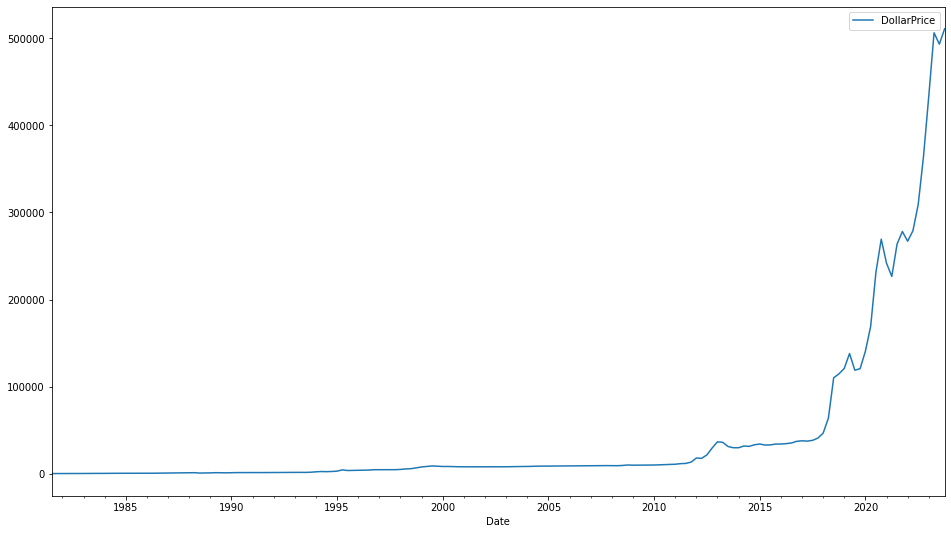

In [14]:
usd_df.plot.line(y=["DollarPrice"], figsize=(16, 9))

In [15]:
eu_usd_model = LinearRegression()

x = quarterly_df.iloc[:-1][['eu']]
y = usd_df.iloc[100:-3][['DollarPrice']]

eu_usd_model.fit(x, y)
eu_usd_model.score(x, y)

0.18034274988154397

In [16]:
seu_usd_model = LinearRegression()

x = quarterly_df.iloc[:-1][['seu']]
y = usd_df.iloc[100:-3][['DollarPrice']]

seu_usd_model.fit(x, y)
seu_usd_model.score(x, y)

0.3451676577691525

In [17]:
pesaran_usd_model = LinearRegression()

x = pesaran_df[9:-4][['s_t']]
y = usd_df.iloc[:-13][['DollarPrice']]

pesaran_usd_model.fit(x, y)
pesaran_usd_model.score(x, y)

0.23665872077732486

In [18]:
tse_df = pd.read_csv('../data/tse_history.csv')

tse_df['date'] = pd.to_datetime(tse_df['date'])

tse_df.set_index('date', inplace=True)

tse_df = tse_df.resample('QS').mean()

tse_df

,value
date,
2008-10-01,8.916110e+03
2009-01-01,8.331759e+03
2009-04-01,8.829256e+03
2009-07-01,1.057003e+04
2009-10-01,1.196656e+04
2010-01-01,1.192630e+04
2010-04-01,1.407488e+04
2010-07-01,1.686120e+04
2010-10-01,1.829673e+04


<AxesSubplot:xlabel='date'>

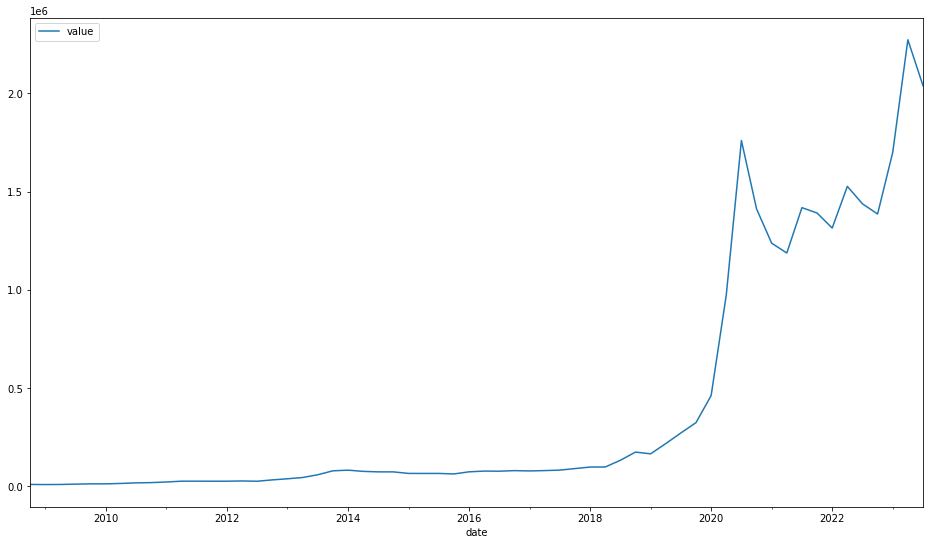

In [19]:
tse_df.plot.line(y=["value"], figsize=(16, 9))

In [20]:
eu_tse_model = LinearRegression()

x = quarterly_df.iloc[9:][['eu']]
y = tse_df.iloc[:-1][['value']]

eu_tse_model.fit(x, y)
eu_tse_model.score(x, y)

0.22264082937440266

In [21]:
seu_tse_model = LinearRegression()

x = quarterly_df.iloc[9:][['seu']]
y = tse_df.iloc[:-1][['value']]

seu_tse_model.fit(x, y)
seu_tse_model.score(x, y)

0.20527783161123203

In [22]:
pesaran_tse_model = LinearRegression()

x = pesaran_df.iloc[118:-4][['s_t']]
y = tse_df.iloc[:-12][['value']]

pesaran_tse_model.fit(x, y)
pesaran_tse_model.score(x, y)

0.0009739887483763976

In [23]:
#Forecast the dollar price
y=usd_df['DollarPrice']
forecaster = ForecasterAutoreg(
                regressor = LinearRegression(), #Choosing the Regressor Type
                lags      = 1 #The period or seasonality of the data
             )

forecaster.fit(y) #Giving the Data to the Forecaster
forecaster

ForecasterAutoreg 
Regressor: LinearRegression() 
Lags: [1] 
Transformer for y: None 
Transformer for exog: None 
Window size: 1 
Weight function included: False 
Differentiation order: None 
Exogenous included: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [Timestamp('1981-07-01 00:00:00'), Timestamp('2023-10-01 00:00:00')] 
Training index type: DatetimeIndex 
Training index frequency: QS-JAN 
Regressor parameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False} 
fit_kwargs: {} 
Creation date: 2024-02-02 14:09:38 
Last fit date: 2024-02-02 14:09:38 
Skforecast version: 0.10.1 
Python version: 3.10.5 
Forecaster id: None 

In [24]:
steps = 4
predictions = forecaster.predict(steps=steps)
predictions.head(14)

2024-01-01    547241.701951
2024-04-01    586433.180658
2024-07-01    628417.177281
2024-10-01    673392.667634
Freq: QS-JAN, Name: pred, dtype: float64

In [25]:
#forecaster.get_coef()
params = {'intercept': forecaster.regressor.intercept_, 'coef': forecaster.regressor.coef_}
print(params)

{'intercept': 198.76120442454703, 'coef': array([1.07125319])}


In [14]:
return_m=pd.read_csv('../data/tse_history_monthly.csv')
return_m['Date']=pd.to_datetime(return_m['Date'])
return_m.set_index('Date',inplace=True)
return_m = return_m.resample('QS').last()
return_m['value_2']=return_m['value'].shift(1)
return_m.dropna(inplace=True)
return_m['Sum of Market Return']=(return_m['value']-return_m['value_2']).div(return_m['value_2'])
return_s=pd.read_csv('../data/Market_Return_of_Sanctioned_Shares.csv')
return_s['Date']=pd.to_datetime(return_s['Date'])
return_s.set_index('Date',inplace=True)
return_s = return_s.resample('QS').mean()
return_e=pd.read_csv('../data/Market_Return_of_ExportOriented_Shares.csv')
return_e['Date']=pd.to_datetime(return_e['Date'])
return_e.set_index('Date',inplace=True)
return_e= return_e.resample('QS').mean()

In [27]:
eu_market_return_model = LinearRegression()

x = quarterly_df.iloc[10:][['eu']]
y = return_m.iloc[:-1][['Sum of Market Return']]

eu_market_return_model.fit(x, y)
eu_market_return_model.score(x, y)
#eu_market_return_model.coef_
#eu_market_return_model.intercept_
print(f'This model has R^2 score of {eu_market_return_model.score(x, y)}\n and Coefficent of {eu_market_return_model.coef_}\n and Intercept of {eu_market_return_model.intercept_}\n and MSE of {mean_squared_error(y,eu_market_return_model.predict(x))}')

This model has R^2 score of 0.053912797469702234
 and Coefficent of [[0.52937133]]
 and Intercept of [-0.30688469]
 and MSE of 0.04995267847412932


In [28]:
seu_market_return_model = LinearRegression()

x = quarterly_df.iloc[10:][['seu']]
y = return_m.iloc[:-1][['Sum of Market Return']]

seu_market_return_model.fit(x, y)
seu_market_return_model.score(x, y)
print(f'This model has R^2 score of {seu_market_return_model.score(x, y)}\n and Coefficent of {seu_market_return_model.coef_}\n and Intercept of {seu_market_return_model.intercept_}\n and MSE of {mean_squared_error(y,seu_market_return_model.predict(x))}')

This model has R^2 score of 0.006019400329772773
 and Coefficent of [[0.1948944]]
 and Intercept of [0.07487849]
 and MSE of 0.052481413100246475


In [34]:
pesaran_market_return_model = LinearRegression()

x = pesaran_df[119:166][['s_t']]
y = return_m.iloc[:47][['Sum of Market Return']]

pesaran_market_return_model.fit(x, y)
pesaran_market_return_model.score(x, y)
print(f'This model has R^2 score of {pesaran_market_return_model.score(x, y)}\n and Coefficent of {pesaran_market_return_model.coef_}\n and Intercept of {pesaran_market_return_model.intercept_}\n and MSE of {mean_squared_error(y,pesaran_market_return_model.predict(x))}')

This model has R^2 score of 0.030059851499573798
 and Coefficent of [[0.19062031]]
 and Intercept of [0.06618466]
 and MSE of 0.056878677719125886


In [38]:
eu_sanctioned_market_return_model = LinearRegression()

x = quarterly_df.iloc[:][['eu']]
y = return_s.iloc[22:-2][['Sum of Market(Percent)']]/100

eu_sanctioned_market_return_model.fit(x, y)
eu_sanctioned_market_return_model.score(x, y)
print(f'This model has R^2 score of {eu_sanctioned_market_return_model.score(x, y)}\n and Coefficent of {eu_sanctioned_market_return_model.coef_}\n and Intercept of {eu_sanctioned_market_return_model.intercept_}\n and MSE of {mean_squared_error(y,eu_sanctioned_market_return_model.predict(x))}')

This model has R^2 score of 0.4977560524275412
 and Coefficent of [[-5.30681196]]
 and Intercept of [4.99164158]
 and MSE of 0.2553807051581894


In [31]:
seu_sanctioned_market_return_model = LinearRegression()

x = quarterly_df.iloc[:][['seu']]
y = return_s.iloc[22:-2][['Sum of Market(Percent)']]/100

seu_sanctioned_market_return_model.fit(x, y)
seu_sanctioned_market_return_model.score(x, y)
print(f'This model has R^2 score of {seu_sanctioned_market_return_model.score(x, y)}\n and Coefficent of {seu_sanctioned_market_return_model.coef_}\n and Intercept of {seu_sanctioned_market_return_model.intercept_}\n and MSE of {mean_squared_error(y,seu_sanctioned_market_return_model.predict(x))}')

This model has R^2 score of 0.09976808525145497
 and Coefficent of [[2.28392994]]
 and Intercept of [0.25432345]
 and MSE of 0.45774939111878993


In [32]:
pesaran_sanctioned_market_return_model = LinearRegression()

x = pesaran_df[118:166][['s_t']]
y = return_s.iloc[:48][['Sum of Market(Percent)']]/100

pesaran_sanctioned_market_return_model.fit(x, y)
pesaran_sanctioned_market_return_model.score(x, y)
print(f'This model has R^2 score of {pesaran_sanctioned_market_return_model.score(x, y)}\n and Coefficent of {pesaran_sanctioned_market_return_model.coef_}\n and Intercept of {pesaran_sanctioned_market_return_model.intercept_}\n and MSE of {mean_squared_error(y,pesaran_sanctioned_market_return_model.predict(x))}')

This model has R^2 score of 0.08213970007219151
 and Coefficent of [[-0.10791728]]
 and Intercept of [0.13412001]
 and MSE of 0.006260879973649912


In [33]:
eu_export_market_return_model = LinearRegression()

x = quarterly_df.iloc[:][['eu']]
y = return_e.iloc[22:-2][['Sum of Market(Percent)']]/100

eu_export_market_return_model.fit(x, y)
eu_export_market_return_model.score(x, y)
print(f'This model has R^2 score of {eu_export_market_return_model.score(x, y)}\n and Coefficent of {eu_export_market_return_model.coef_}\n and Intercept of {eu_export_market_return_model.intercept_}\n and MSE of {mean_squared_error(y,eu_export_market_return_model.predict(x))}')

This model has R^2 score of 0.08958546861734462
 and Coefficent of [[-0.26723787]]
 and Intercept of [0.38862972]
 and MSE of 0.006522590972848445


In [34]:
seu_export_market_return_model = LinearRegression()

x = quarterly_df.iloc[:][['seu']]
y = return_e.iloc[22:-2][['Sum of Market(Percent)']]/100

seu_export_market_return_model.fit(x, y)
seu_export_market_return_model.score(x, y)
print(f'This model has R^2 score of {seu_export_market_return_model.score(x, y)}\n and Coefficent of {seu_export_market_return_model.coef_}\n and Intercept of {seu_export_market_return_model.intercept_}\n and MSE of {mean_squared_error(y,seu_export_market_return_model.predict(x))}')

This model has R^2 score of 0.029280108428545226
 and Coefficent of [[-0.14686797]]
 and Intercept of [0.2022182]
 and MSE of 0.006954643828358624


In [35]:
pesaran_export_market_return_model = LinearRegression()

x = pesaran_df[118:166][['s_t']]
y = return_e.iloc[:48][['Sum of Market(Percent)']]/100

pesaran_export_market_return_model.fit(x, y)
pesaran_export_market_return_model.score(x, y)
print(f'This model has R^2 score of {pesaran_export_market_return_model.score(x, y)}\n and Coefficent of {pesaran_export_market_return_model.coef_}\n and Intercept of {pesaran_export_market_return_model.intercept_}\n and MSE of {mean_squared_error(y,pesaran_export_market_return_model.predict(x))}')

This model has R^2 score of 0.03471493651454116
 and Coefficent of [[0.08050089]]
 and Intercept of [0.09794917]
 and MSE of 0.008669030641735919


In [36]:
dollar_market_return_model = LinearRegression()

x = usd_df.iloc[109:][['DollarPrice']]
y = return_m.iloc[:][['Sum of Market Return']]

dollar_market_return_model.fit(x, y)
dollar_market_return_model.score(x, y)
#eu_market_return_model.coef_
#eu_market_return_model.intercept_
print(f'This model has R^2 score of {dollar_market_return_model.score(x, y)}\n and Coefficent of {dollar_market_return_model.coef_}\n and Intercept of {dollar_market_return_model.intercept_}\n and MSE of {mean_squared_error(y,dollar_market_return_model.predict(x))}')

This model has R^2 score of 0.2845566588004297
 and Coefficent of [[-4.39243804e-07]]
 and Intercept of [0.30967558]
 and MSE of 0.009016792469533842


In [37]:
dollar_sanctioned_market_return_model = LinearRegression()

x = usd_df.iloc[-92:][['DollarPrice']]
y = return_s.iloc[:][['Sum of Market(Percent)']]/100

dollar_sanctioned_market_return_model.fit(x, y)
dollar_sanctioned_market_return_model.score(x, y)
print(f'This model has R^2 score of {dollar_sanctioned_market_return_model.score(x, y)}\n and Coefficent of {dollar_sanctioned_market_return_model.coef_}\n and Intercept of {dollar_sanctioned_market_return_model.intercept_}\n and MSE of {mean_squared_error(y,dollar_sanctioned_market_return_model.predict(x))}')

This model has R^2 score of 0.0064114998993098915
 and Coefficent of [[-4.4941588e-07]]
 and Intercept of [0.57087981]
 and MSE of 0.45806624246079763


In [38]:
dollar_export_market_return_model = LinearRegression()

x = usd_df.iloc[-92:][['DollarPrice']]
y = return_e.iloc[:][['Sum of Market(Percent)']]/100

dollar_export_market_return_model.fit(x, y)
dollar_export_market_return_model.score(x, y)
print(f'This model has R^2 score of {dollar_export_market_return_model.score(x, y)}\n and Coefficent of {dollar_export_market_return_model.coef_}\n and Intercept of {dollar_export_market_return_model.intercept_}\n and MSE of {mean_squared_error(y,dollar_export_market_return_model.predict(x))}')

This model has R^2 score of 0.0008899421507668759
 and Coefficent of [[-2.20414606e-08]]
 and Intercept of [0.1448426]
 and MSE of 0.00798209396120861


In [40]:
#Market Return and EU

# Fit eGARCH model
model = arch_model(return_m['Sum of Market Return'], vol='EGARCH', p=1, q=1)
results_egarch = model.fit()
# Display model summary
#print(results.summary())
#f.mean.dropna()
conditional_volatility = results_egarch.conditional_volatility

# Perform linear regression
X = quarterly_df.iloc[10:][['eu']]  # Independent variable
y = conditional_volatility.iloc[:-1] # Dependent variable
X = sm.add_constant(X)  # Add a constant for the intercept term
model = sm.OLS(y, X)
results_regression = model.fit()

# Print regression results
print(results_regression.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 2799450.0242033494
Iteration:      2,   Func. Count:     14,   Neg. LLF: 621170.9621537804
Iteration:      3,   Func. Count:     21,   Neg. LLF: 54.47367025911879
Iteration:      4,   Func. Count:     29,   Neg. LLF: -13.945715037488682
Iteration:      5,   Func. Count:     34,   Neg. LLF: -15.179039581867169
Iteration:      6,   Func. Count:     39,   Neg. LLF: -15.198468086396831
Iteration:      7,   Func. Count:     44,   Neg. LLF: -15.22103210212899
Iteration:      8,   Func. Count:     49,   Neg. LLF: -15.235771903719817
Iteration:      9,   Func. Count:     54,   Neg. LLF: -15.239610795630552
Iteration:     10,   Func. Count:     59,   Neg. LLF: -15.240277722909576
Iteration:     11,   Func. Count:     64,   Neg. LLF: -15.240288657542411
Iteration:     12,   Func. Count:     68,   Neg. LLF: -15.240288618098628
Optimization terminated successfully    (Exit mode 0)
            Current function value: -15.240288657542411
        

In [41]:
#Market Return and SEU

model = arch_model(return_m['Sum of Market Return'], vol='EGARCH', p=1, q=1)
results_egarch = model.fit()
conditional_volatility = results_egarch.conditional_volatility

X = quarterly_df.iloc[10:][['seu']]  
y = conditional_volatility.iloc[:-1] 
X = sm.add_constant(X)  
model = sm.OLS(y, X)
results_regression = model.fit()

print(results_regression.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 2799450.0242033494
Iteration:      2,   Func. Count:     14,   Neg. LLF: 621170.9621537804
Iteration:      3,   Func. Count:     21,   Neg. LLF: 54.47367025911879
Iteration:      4,   Func. Count:     29,   Neg. LLF: -13.945715037488682
Iteration:      5,   Func. Count:     34,   Neg. LLF: -15.179039581867169
Iteration:      6,   Func. Count:     39,   Neg. LLF: -15.198468086396831
Iteration:      7,   Func. Count:     44,   Neg. LLF: -15.22103210212899
Iteration:      8,   Func. Count:     49,   Neg. LLF: -15.235771903719817
Iteration:      9,   Func. Count:     54,   Neg. LLF: -15.239610795630552
Iteration:     10,   Func. Count:     59,   Neg. LLF: -15.240277722909576
Iteration:     11,   Func. Count:     64,   Neg. LLF: -15.240288657542411
Iteration:     12,   Func. Count:     68,   Neg. LLF: -15.240288618098628
Optimization terminated successfully    (Exit mode 0)
            Current function value: -15.240288657542411
        

In [45]:
#Market Return and LT

model = arch_model(return_m['Sum of Market Return'], vol='EGARCH', p=1, q=1)
results_egarch = model.fit()
conditional_volatility = results_egarch.conditional_volatility

X = pesaran_df[119:166][['s_t']]
y = conditional_volatility.iloc[:47] 
X = sm.add_constant(X)  
model = sm.OLS(y, X)
results_regression = model.fit()

print(results_regression.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 2799450.0242033494
Iteration:      2,   Func. Count:     14,   Neg. LLF: 621170.9621537804
Iteration:      3,   Func. Count:     21,   Neg. LLF: 54.47367025911879
Iteration:      4,   Func. Count:     29,   Neg. LLF: -13.945715037488682
Iteration:      5,   Func. Count:     34,   Neg. LLF: -15.179039581867169
Iteration:      6,   Func. Count:     39,   Neg. LLF: -15.198468086396831
Iteration:      7,   Func. Count:     44,   Neg. LLF: -15.22103210212899
Iteration:      8,   Func. Count:     49,   Neg. LLF: -15.235771903719817
Iteration:      9,   Func. Count:     54,   Neg. LLF: -15.239610795630552
Iteration:     10,   Func. Count:     59,   Neg. LLF: -15.240277722909576
Iteration:     11,   Func. Count:     64,   Neg. LLF: -15.240288657542411
Iteration:     12,   Func. Count:     68,   Neg. LLF: -15.240288618098628
Optimization terminated successfully    (Exit mode 0)
            Current function value: -15.240288657542411
        

In [42]:
#Sanctioned Market Return and EU

model = arch_model(return_s['Sum of Market(Percent)'], vol='EGARCH', p=1, q=1)
results_egarch = model.fit()
conditional_volatility = results_egarch.conditional_volatility

X = quarterly_df.iloc[:][['eu']]  
y = conditional_volatility.iloc[22:-2] 
X = sm.add_constant(X)  
model = sm.OLS(y, X)
results_regression = model.fit()

print(results_regression.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 28321732.56507575
Iteration:      2,   Func. Count:     14,   Neg. LLF: 21994830.384475753
Iteration:      3,   Func. Count:     23,   Neg. LLF: 511.09776717225475
Iteration:      4,   Func. Count:     30,   Neg. LLF: 506.17926712500764
Iteration:      5,   Func. Count:     35,   Neg. LLF: 504.5905061461893
Iteration:      6,   Func. Count:     40,   Neg. LLF: 497.35620552877026
Iteration:      7,   Func. Count:     45,   Neg. LLF: 493.9601178778995
Iteration:      8,   Func. Count:     50,   Neg. LLF: 481.5852423218886
Iteration:      9,   Func. Count:     55,   Neg. LLF: 505.99547069098975
Iteration:     10,   Func. Count:     61,   Neg. LLF: 485.26929601852953
Iteration:     11,   Func. Count:     69,   Neg. LLF: 449.88536635716684
Iteration:     12,   Func. Count:     75,   Neg. LLF: 425.1933841564746
Iteration:     13,   Func. Count:     80,   Neg. LLF: 423.7475129171407
Iteration:     14,   Func. Count:     86,   Neg. LLF: 411

In [43]:
#Sanctioned Market Return and SEU

model = arch_model(return_s['Sum of Market(Percent)'], vol='EGARCH', p=1, q=1)
results_egarch = model.fit()
conditional_volatility = results_egarch.conditional_volatility

X = quarterly_df.iloc[:][['seu']]  
y = conditional_volatility.iloc[22:-2] 
X = sm.add_constant(X)  
model = sm.OLS(y, X)
results_regression = model.fit()

print(results_regression.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 28321732.56507575
Iteration:      2,   Func. Count:     14,   Neg. LLF: 21994830.384475753
Iteration:      3,   Func. Count:     23,   Neg. LLF: 511.09776717225475
Iteration:      4,   Func. Count:     30,   Neg. LLF: 506.17926712500764
Iteration:      5,   Func. Count:     35,   Neg. LLF: 504.5905061461893
Iteration:      6,   Func. Count:     40,   Neg. LLF: 497.35620552877026
Iteration:      7,   Func. Count:     45,   Neg. LLF: 493.9601178778995
Iteration:      8,   Func. Count:     50,   Neg. LLF: 481.5852423218886
Iteration:      9,   Func. Count:     55,   Neg. LLF: 505.99547069098975
Iteration:     10,   Func. Count:     61,   Neg. LLF: 485.26929601852953
Iteration:     11,   Func. Count:     69,   Neg. LLF: 449.88536635716684
Iteration:     12,   Func. Count:     75,   Neg. LLF: 425.1933841564746
Iteration:     13,   Func. Count:     80,   Neg. LLF: 423.7475129171407
Iteration:     14,   Func. Count:     86,   Neg. LLF: 411

In [44]:
#Sanctioned Market Return and LT

model = arch_model(return_s['Sum of Market(Percent)'], vol='EGARCH', p=1, q=1)
results_egarch = model.fit()
conditional_volatility = results_egarch.conditional_volatility

X = pesaran_df[87:166][['s_t']]
y = conditional_volatility.iloc[:-13] 
X = sm.add_constant(X)  
model = sm.OLS(y, X)
results_regression = model.fit()

print(results_regression.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 28321732.56507575
Iteration:      2,   Func. Count:     14,   Neg. LLF: 21994830.384475753
Iteration:      3,   Func. Count:     23,   Neg. LLF: 511.09776717225475
Iteration:      4,   Func. Count:     30,   Neg. LLF: 506.17926712500764
Iteration:      5,   Func. Count:     35,   Neg. LLF: 504.5905061461893
Iteration:      6,   Func. Count:     40,   Neg. LLF: 497.35620552877026
Iteration:      7,   Func. Count:     45,   Neg. LLF: 493.9601178778995
Iteration:      8,   Func. Count:     50,   Neg. LLF: 481.5852423218886
Iteration:      9,   Func. Count:     55,   Neg. LLF: 505.99547069098975
Iteration:     10,   Func. Count:     61,   Neg. LLF: 485.26929601852953
Iteration:     11,   Func. Count:     69,   Neg. LLF: 449.88536635716684
Iteration:     12,   Func. Count:     75,   Neg. LLF: 425.1933841564746
Iteration:     13,   Func. Count:     80,   Neg. LLF: 423.7475129171407
Iteration:     14,   Func. Count:     86,   Neg. LLF: 411

In [45]:
#Export Oriented Market Return and EU

model = arch_model(return_e['Sum of Market(Percent)'], vol='EGARCH', p=1, q=1)
results_egarch = model.fit()
conditional_volatility = results_egarch.conditional_volatility

X = quarterly_df.iloc[:][['eu']]  
y = conditional_volatility.iloc[22:-2] 
X = sm.add_constant(X)  
model = sm.OLS(y, X)
results_regression = model.fit()

print(results_regression.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 27525194.43175646
Iteration:      2,   Func. Count:     13,   Neg. LLF: 485.01570802281094
Iteration:      3,   Func. Count:     21,   Neg. LLF: 331.16456195440327
Iteration:      4,   Func. Count:     27,   Neg. LLF: 340.88920102726456
Iteration:      5,   Func. Count:     33,   Neg. LLF: 335.94193329214045
Iteration:      6,   Func. Count:     39,   Neg. LLF: 314.7030446609096
Iteration:      7,   Func. Count:     45,   Neg. LLF: 313.4384234705435
Iteration:      8,   Func. Count:     50,   Neg. LLF: 313.4060814373626
Iteration:      9,   Func. Count:     55,   Neg. LLF: 313.40204073455766
Iteration:     10,   Func. Count:     60,   Neg. LLF: 313.4010037782655
Iteration:     11,   Func. Count:     65,   Neg. LLF: 313.4009370063145
Iteration:     12,   Func. Count:     70,   Neg. LLF: 313.40093292475746
Iteration:     13,   Func. Count:     74,   Neg. LLF: 313.40093292471204
Optimization terminated successfully    (Exit mode 0)
   

In [46]:
#Export Oriented Market Return and SEU

model = arch_model(return_e['Sum of Market(Percent)'], vol='EGARCH', p=1, q=1)
results_egarch = model.fit()
conditional_volatility = results_egarch.conditional_volatility

X = quarterly_df.iloc[:][['seu']]  
y = conditional_volatility.iloc[22:-2] 
X = sm.add_constant(X)  
model = sm.OLS(y, X)
results_regression = model.fit()

print(results_regression.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 27525194.43175646
Iteration:      2,   Func. Count:     13,   Neg. LLF: 485.01570802281094
Iteration:      3,   Func. Count:     21,   Neg. LLF: 331.16456195440327
Iteration:      4,   Func. Count:     27,   Neg. LLF: 340.88920102726456
Iteration:      5,   Func. Count:     33,   Neg. LLF: 335.94193329214045
Iteration:      6,   Func. Count:     39,   Neg. LLF: 314.7030446609096
Iteration:      7,   Func. Count:     45,   Neg. LLF: 313.4384234705435
Iteration:      8,   Func. Count:     50,   Neg. LLF: 313.4060814373626
Iteration:      9,   Func. Count:     55,   Neg. LLF: 313.40204073455766
Iteration:     10,   Func. Count:     60,   Neg. LLF: 313.4010037782655
Iteration:     11,   Func. Count:     65,   Neg. LLF: 313.4009370063145
Iteration:     12,   Func. Count:     70,   Neg. LLF: 313.40093292475746
Iteration:     13,   Func. Count:     74,   Neg. LLF: 313.40093292471204
Optimization terminated successfully    (Exit mode 0)
   

In [47]:
#Export Oriented Market Return and LT

model = arch_model(return_e['Sum of Market(Percent)'], vol='EGARCH', p=1, q=1)
results_egarch = model.fit()
conditional_volatility = results_egarch.conditional_volatility

X = pesaran_df[87:166][['s_t']]
y = conditional_volatility.iloc[:-13] 
X = sm.add_constant(X)  
model = sm.OLS(y, X)
results_regression = model.fit()

print(results_regression.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 27525194.43175646
Iteration:      2,   Func. Count:     13,   Neg. LLF: 485.01570802281094
Iteration:      3,   Func. Count:     21,   Neg. LLF: 331.16456195440327
Iteration:      4,   Func. Count:     27,   Neg. LLF: 340.88920102726456
Iteration:      5,   Func. Count:     33,   Neg. LLF: 335.94193329214045
Iteration:      6,   Func. Count:     39,   Neg. LLF: 314.7030446609096
Iteration:      7,   Func. Count:     45,   Neg. LLF: 313.4384234705435
Iteration:      8,   Func. Count:     50,   Neg. LLF: 313.4060814373626
Iteration:      9,   Func. Count:     55,   Neg. LLF: 313.40204073455766
Iteration:     10,   Func. Count:     60,   Neg. LLF: 313.4010037782655
Iteration:     11,   Func. Count:     65,   Neg. LLF: 313.4009370063145
Iteration:     12,   Func. Count:     70,   Neg. LLF: 313.40093292475746
Iteration:     13,   Func. Count:     74,   Neg. LLF: 313.40093292471204
Optimization terminated successfully    (Exit mode 0)
   

In [46]:
import matplotlib.pyplot as plt
# Plot the conditional volatility
fig = results.plot(annualize='D')  # 'D' indicates daily frequency, adjust as needed
plt.show()

NameError: name 'results' is not defined

In [49]:
#Sanctioned Market Return

# Fit eGARCH model
model = arch_model(return_s['Sum of Market(Percent)'], vol='EGARCH', p=1, q=1)
results = model.fit()

# Display model summary
print(results.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 28321732.56507575
Iteration:      2,   Func. Count:     14,   Neg. LLF: 21994830.384475753
Iteration:      3,   Func. Count:     23,   Neg. LLF: 511.09776717225475
Iteration:      4,   Func. Count:     30,   Neg. LLF: 506.17926712500764
Iteration:      5,   Func. Count:     35,   Neg. LLF: 504.5905061461893
Iteration:      6,   Func. Count:     40,   Neg. LLF: 497.35620552877026
Iteration:      7,   Func. Count:     45,   Neg. LLF: 493.9601178778995
Iteration:      8,   Func. Count:     50,   Neg. LLF: 481.5852423218886
Iteration:      9,   Func. Count:     55,   Neg. LLF: 505.99547069098975
Iteration:     10,   Func. Count:     61,   Neg. LLF: 485.26929601852953
Iteration:     11,   Func. Count:     69,   Neg. LLF: 449.88536635716684
Iteration:     12,   Func. Count:     75,   Neg. LLF: 425.1933841564746
Iteration:     13,   Func. Count:     80,   Neg. LLF: 423.7475129171407
Iteration:     14,   Func. Count:     86,   Neg. LLF: 411

In [50]:
#Export Oriented Market Return

# Fit eGARCH model
model = arch_model(return_e['Sum of Market(Percent)'], vol='EGARCH', p=1, q=1)
results = model.fit()

# Display model summary
print(results.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 27525194.43175646
Iteration:      2,   Func. Count:     13,   Neg. LLF: 485.01570802281094
Iteration:      3,   Func. Count:     21,   Neg. LLF: 331.16456195440327
Iteration:      4,   Func. Count:     27,   Neg. LLF: 340.88920102726456
Iteration:      5,   Func. Count:     33,   Neg. LLF: 335.94193329214045
Iteration:      6,   Func. Count:     39,   Neg. LLF: 314.7030446609096
Iteration:      7,   Func. Count:     45,   Neg. LLF: 313.4384234705435
Iteration:      8,   Func. Count:     50,   Neg. LLF: 313.4060814373626
Iteration:      9,   Func. Count:     55,   Neg. LLF: 313.40204073455766
Iteration:     10,   Func. Count:     60,   Neg. LLF: 313.4010037782655
Iteration:     11,   Func. Count:     65,   Neg. LLF: 313.4009370063145
Iteration:     12,   Func. Count:     70,   Neg. LLF: 313.40093292475746
Iteration:     13,   Func. Count:     74,   Neg. LLF: 313.40093292471204
Optimization terminated successfully    (Exit mode 0)
   

# Forecasting Regressions

In [67]:
eu_market_return_model = LinearRegression()

x = quarterly_df.iloc[9:][['eu']].shift(1)
x.dropna(inplace=True)
y = return_m.iloc[:-1][['Sum of Market Return']]

eu_market_return_model.fit(x, y)
eu_market_return_model.score(x, y)
#eu_market_return_model.coef_
#eu_market_return_model.intercept_
print(f'This model has R^2 score of {eu_market_return_model.score(x, y)}\n and Coefficent of {eu_market_return_model.coef_}\n and Intercept of {eu_market_return_model.intercept_}\n and MSE of {mean_squared_error(y,eu_market_return_model.predict(x))}')

This model has R^2 score of 0.011304106143652515
 and Coefficent of [[0.24259846]]
 and Intercept of [-0.07685451]
 and MSE of 0.05220238468759586


In [68]:
seu_market_return_model = LinearRegression()

x = quarterly_df.iloc[9:][['seu']].shift(1)
x.dropna(inplace=True)
y = return_m.iloc[:-1][['Sum of Market Return']]

seu_market_return_model.fit(x, y)
seu_market_return_model.score(x, y)
print(f'This model has R^2 score of {seu_market_return_model.score(x, y)}\n and Coefficent of {seu_market_return_model.coef_}\n and Intercept of {seu_market_return_model.intercept_}\n and MSE of {mean_squared_error(y,seu_market_return_model.predict(x))}')

This model has R^2 score of 0.003534729943341808
 and Coefficent of [[0.1454832]]
 and Intercept of [0.08620513]
 and MSE of 0.052612601790459845


In [69]:
pesaran_market_return_model = LinearRegression()

x = pesaran_df[118:166][['s_t']].shift(1)
x.dropna(inplace=True)
y = return_m.iloc[:47][['Sum of Market Return']]

pesaran_market_return_model.fit(x, y)
pesaran_market_return_model.score(x, y)
print(f'This model has R^2 score of {pesaran_market_return_model.score(x, y)}\n and Coefficent of {pesaran_market_return_model.coef_}\n and Intercept of {pesaran_market_return_model.intercept_}\n and MSE of {mean_squared_error(y,pesaran_market_return_model.predict(x))}')

This model has R^2 score of 0.0972955439912192
 and Coefficent of [[0.34268876]]
 and Intercept of [0.01031869]
 and MSE of 0.05293588053688009


In [55]:
eu_sanctioned_market_return_model = LinearRegression()

x = quarterly_df.iloc[:][['eu']].shift(1)
x.dropna(inplace=True)
y = return_s.iloc[23:-2][['Sum of Market(Percent)']]/100

eu_sanctioned_market_return_model.fit(x, y)
eu_sanctioned_market_return_model.score(x, y)
print(f'This model has R^2 score of {eu_sanctioned_market_return_model.score(x, y)}\n and Coefficent of {eu_sanctioned_market_return_model.coef_}\n and Intercept of {eu_sanctioned_market_return_model.intercept_}\n and MSE of {mean_squared_error(y,eu_sanctioned_market_return_model.predict(x))}')

This model has R^2 score of 0.46357240989701565
 and Coefficent of [[-5.1343412]]
 and Intercept of [4.85428461]
 and MSE of 0.2734570609656145


In [56]:
seu_sanctioned_market_return_model = LinearRegression()

x = quarterly_df.iloc[:][['seu']].shift(1)
x.dropna(inplace=True)
y = return_s.iloc[23:-2][['Sum of Market(Percent)']]/100

seu_sanctioned_market_return_model.fit(x, y)
seu_sanctioned_market_return_model.score(x, y)
print(f'This model has R^2 score of {seu_sanctioned_market_return_model.score(x, y)}\n and Coefficent of {seu_sanctioned_market_return_model.coef_}\n and Intercept of {seu_sanctioned_market_return_model.intercept_}\n and MSE of {mean_squared_error(y,seu_sanctioned_market_return_model.predict(x))}')

This model has R^2 score of 0.09145570297301675
 and Coefficent of [[2.17635583]]
 and Intercept of [0.28674542]
 and MSE of 0.46315263757103103


In [57]:
pesaran_sanctioned_market_return_model = LinearRegression()

x = pesaran_df[118:166][['s_t']].shift(1)
x.dropna(inplace=True)
y = return_s.iloc[1:48][['Sum of Market(Percent)']]/100

pesaran_sanctioned_market_return_model.fit(x, y)
pesaran_sanctioned_market_return_model.score(x, y)
print(f'This model has R^2 score of {pesaran_sanctioned_market_return_model.score(x, y)}\n and Coefficent of {pesaran_sanctioned_market_return_model.coef_}\n and Intercept of {pesaran_sanctioned_market_return_model.intercept_}\n and MSE of {mean_squared_error(y,pesaran_sanctioned_market_return_model.predict(x))}')

This model has R^2 score of 0.054848647747925305
 and Coefficent of [[-0.08852995]]
 and Intercept of [0.1280622]
 and MSE of 0.006561658528894163


In [58]:
eu_export_market_return_model = LinearRegression()

x = quarterly_df.iloc[:][['eu']].shift(1)
x.dropna(inplace=True)
y = return_e.iloc[23:-2][['Sum of Market(Percent)']]/100

eu_export_market_return_model.fit(x, y)
eu_export_market_return_model.score(x, y)
print(f'This model has R^2 score of {eu_export_market_return_model.score(x, y)}\n and Coefficent of {eu_export_market_return_model.coef_}\n and Intercept of {eu_export_market_return_model.intercept_}\n and MSE of {mean_squared_error(y,eu_export_market_return_model.predict(x))}')

This model has R^2 score of 0.06154387834850217
 and Coefficent of [[-0.22234826]]
 and Intercept of [0.35308203]
 and MSE of 0.006758070899589125


In [59]:
seu_export_market_return_model = LinearRegression()

x = quarterly_df.iloc[:][['seu']].shift(1)
x.dropna(inplace=True)
y = return_e.iloc[23:-2][['Sum of Market(Percent)']]/100

seu_export_market_return_model.fit(x, y)
seu_export_market_return_model.score(x, y)
print(f'This model has R^2 score of {seu_export_market_return_model.score(x, y)}\n and Coefficent of {seu_export_market_return_model.coef_}\n and Intercept of {seu_export_market_return_model.intercept_}\n and MSE of {mean_squared_error(y,seu_export_market_return_model.predict(x))}')

This model has R^2 score of 0.04469988292407445
 and Coefficent of [[-0.1808394]]
 and Intercept of [0.20988345]
 and MSE of 0.006879368968496507


In [60]:
pesaran_export_market_return_model = LinearRegression()

x = pesaran_df[118:166][['s_t']].shift(1)
x.dropna(inplace=True)
y = return_e.iloc[1:48][['Sum of Market(Percent)']]/100

pesaran_export_market_return_model.fit(x, y)
pesaran_export_market_return_model.score(x, y)
print(f'This model has R^2 score of {pesaran_export_market_return_model.score(x, y)}\n and Coefficent of {pesaran_export_market_return_model.coef_}\n and Intercept of {pesaran_export_market_return_model.intercept_}\n and MSE of {mean_squared_error(y,pesaran_export_market_return_model.predict(x))}')

This model has R^2 score of 0.02914279283466137
 and Coefficent of [[0.07374579]]
 and Intercept of [0.10164199]
 and MSE of 0.008802305715444431


In [76]:
#Market Return and EU

# Fit eGARCH model
model = arch_model(return_m['Sum of Market Return'], vol='EGARCH', p=1, q=1)
results_egarch = model.fit()
# Display model summary
#print(results.summary())
#f.mean.dropna()
conditional_volatility = results_egarch.conditional_volatility

# Perform linear regression
X = quarterly_df.iloc[10:][['eu']].shift(1)  # Independent variable
X.dropna(inplace=True)
y = conditional_volatility.iloc[1:-1] # Dependent variable
X = sm.add_constant(X)  # Add a constant for the intercept term
model = sm.OLS(y, X)
results_regression = model.fit()

# Print regression results
print(results_regression.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 2799450.0242033494
Iteration:      2,   Func. Count:     14,   Neg. LLF: 621170.9621537804
Iteration:      3,   Func. Count:     21,   Neg. LLF: 54.47367025911879
Iteration:      4,   Func. Count:     29,   Neg. LLF: -13.945715037488682
Iteration:      5,   Func. Count:     34,   Neg. LLF: -15.179039581867169
Iteration:      6,   Func. Count:     39,   Neg. LLF: -15.198468086396831
Iteration:      7,   Func. Count:     44,   Neg. LLF: -15.22103210212899
Iteration:      8,   Func. Count:     49,   Neg. LLF: -15.235771903719817
Iteration:      9,   Func. Count:     54,   Neg. LLF: -15.239610795630552
Iteration:     10,   Func. Count:     59,   Neg. LLF: -15.240277722909576
Iteration:     11,   Func. Count:     64,   Neg. LLF: -15.240288657542411
Iteration:     12,   Func. Count:     68,   Neg. LLF: -15.240288618098628
Optimization terminated successfully    (Exit mode 0)
            Current function value: -15.240288657542411
        

In [77]:
#Market Return and SEU

model = arch_model(return_m['Sum of Market Return'], vol='EGARCH', p=1, q=1)
results_egarch = model.fit()
conditional_volatility = results_egarch.conditional_volatility

X = quarterly_df.iloc[10:][['seu']].shift(1)
X.dropna(inplace=True)
y = conditional_volatility.iloc[1:-1] 
X = sm.add_constant(X)  
model = sm.OLS(y, X)
results_regression = model.fit()

print(results_regression.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 2799450.0242033494
Iteration:      2,   Func. Count:     14,   Neg. LLF: 621170.9621537804
Iteration:      3,   Func. Count:     21,   Neg. LLF: 54.47367025911879
Iteration:      4,   Func. Count:     29,   Neg. LLF: -13.945715037488682
Iteration:      5,   Func. Count:     34,   Neg. LLF: -15.179039581867169
Iteration:      6,   Func. Count:     39,   Neg. LLF: -15.198468086396831
Iteration:      7,   Func. Count:     44,   Neg. LLF: -15.22103210212899
Iteration:      8,   Func. Count:     49,   Neg. LLF: -15.235771903719817
Iteration:      9,   Func. Count:     54,   Neg. LLF: -15.239610795630552
Iteration:     10,   Func. Count:     59,   Neg. LLF: -15.240277722909576
Iteration:     11,   Func. Count:     64,   Neg. LLF: -15.240288657542411
Iteration:     12,   Func. Count:     68,   Neg. LLF: -15.240288618098628
Optimization terminated successfully    (Exit mode 0)
            Current function value: -15.240288657542411
        

In [78]:
#Market Return and LT

model = arch_model(return_m['Sum of Market Return'], vol='EGARCH', p=1, q=1)
results_egarch = model.fit()
conditional_volatility = results_egarch.conditional_volatility

X = pesaran_df[119:166][['s_t']].shift(1)
X.dropna(inplace=True)
y = conditional_volatility.iloc[1:47] 
X = sm.add_constant(X)  
model = sm.OLS(y, X)
results_regression = model.fit()

print(results_regression.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 2799450.0242033494
Iteration:      2,   Func. Count:     14,   Neg. LLF: 621170.9621537804
Iteration:      3,   Func. Count:     21,   Neg. LLF: 54.47367025911879
Iteration:      4,   Func. Count:     29,   Neg. LLF: -13.945715037488682
Iteration:      5,   Func. Count:     34,   Neg. LLF: -15.179039581867169
Iteration:      6,   Func. Count:     39,   Neg. LLF: -15.198468086396831
Iteration:      7,   Func. Count:     44,   Neg. LLF: -15.22103210212899
Iteration:      8,   Func. Count:     49,   Neg. LLF: -15.235771903719817
Iteration:      9,   Func. Count:     54,   Neg. LLF: -15.239610795630552
Iteration:     10,   Func. Count:     59,   Neg. LLF: -15.240277722909576
Iteration:     11,   Func. Count:     64,   Neg. LLF: -15.240288657542411
Iteration:     12,   Func. Count:     68,   Neg. LLF: -15.240288618098628
Optimization terminated successfully    (Exit mode 0)
            Current function value: -15.240288657542411
        